In [2]:
import onnxruntime as ort
import numpy as np
import inference_utils as utils

# Load the ONNX model

model_path = "models/trafficcamnet_pruned_onnx_v1.0.4/resnet18_trafficcamnet_pruned.onnx"
session = ort.InferenceSession(model_path)
# Get model input and output names
input_name = session.get_inputs()[0].name
output_names = [output.name for output in session.get_outputs()]

# Print output info for debugging
for i, output in enumerate(session.get_outputs()):
    print(f"Output {i}: {output.name}, Shape: {output.shape}")

# Prepare input data
# This depends on your model's expected input shape and type
image_path = "images/image2.png"
input_image = utils.image_to_tensor(image_path)
# Run inference
outputs = session.run(output_names, {input_name: input_image})

Output 0: output_cov/Sigmoid:0, Shape: ['unk__151', 4, 34, 60]
Output 1: output_bbox/BiasAdd:0, Shape: ['unk__152', 16, 34, 60]


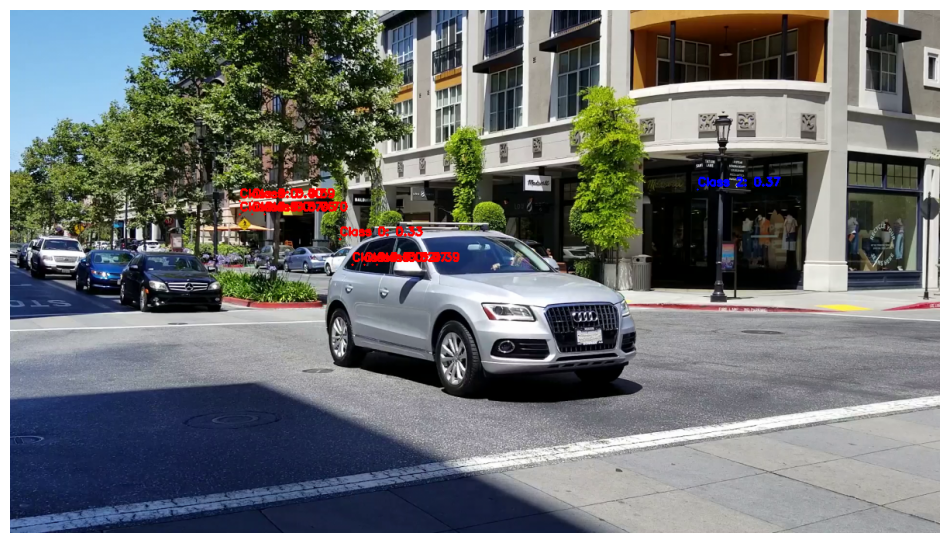

In [ ]:
import importlib
importlib.reload(utils)
import cv2

cv2image = cv2.imread(image_path)
detections = utils.process_model_outputs(outputs[0][0], outputs[1][0],input_image.shape[2:],confidence_threshold=0.3)
annotated_image = utils.visualize_detections(cv2image,detections)

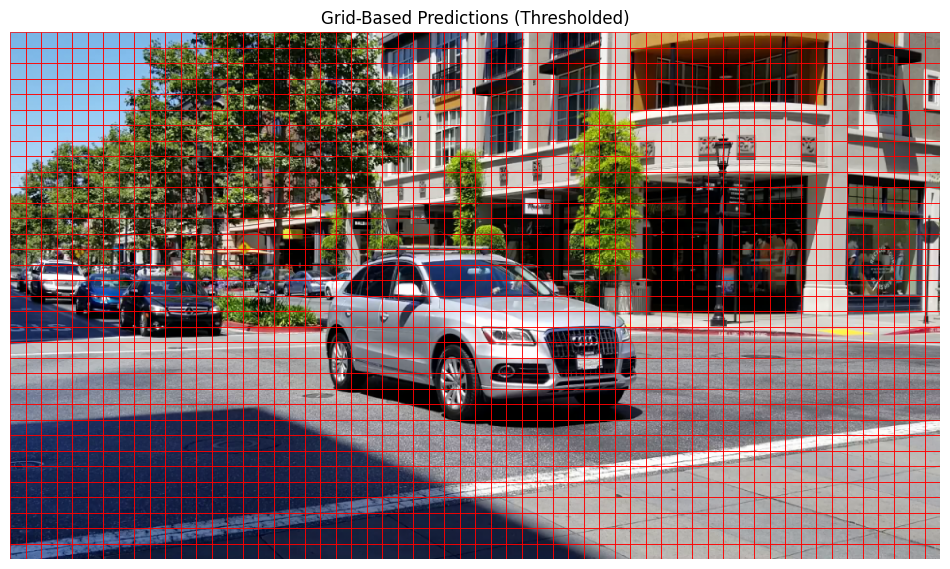

In [ ]:

utils.visualize_predictions_grid(image_path,outputs[0][0],confidence_threshold=1.0)